<a href="https://colab.research.google.com/github/Anapbarbosad/Estudo-de-Casos/blob/main/EstudosDeCaso_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
#O presente trabalho visa mostrar o consumo mundial de carne do período que se extende de 1990 a 2022. Além de uma breve análise dos dados, pretente-se responder também:





## *   Qual o tipo de carne mais consumido mundialmente em média.


## *   Consumo de carne ao longo dos anos


## *   Qual país em média consome mais e menos carne.








---



Informações úteis:

Nome das colunas

***LOCATION***: Localização, o nome do país

***SUBJECT***:O tipo de animal

***TIME***:O ano da informação (1990-2022)

***MEASURE ***:Medida (KG_CAP) e (THND_TONNE)

***Value***:O valor 




In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

#importando bibliotecas

In [2]:
df = pd.read_excel('df.xlsx')
df = df.loc[df['TIME'] <= 2022]
display(df)
#filtrando apenas dados antes ou iguais a 2022

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991.0,27.721815
1,AUS,BEEF,KG_CAP,1992.0,26.199591
2,AUS,BEEF,KG_CAP,1993.0,26.169094
3,AUS,BEEF,KG_CAP,1994.0,25.456134
4,AUS,BEEF,KG_CAP,1995.0,25.340226
...,...,...,...,...,...
13751,MYS,SHEEP,THND_TONNE,2018.0,41.373219
13752,MYS,SHEEP,THND_TONNE,2019.0,42.042755
13753,MYS,SHEEP,THND_TONNE,2020.0,42.695193
13754,MYS,SHEEP,THND_TONNE,2021.0,43.412791


In [3]:
df.shape

(12256, 5)

In [4]:
df.info()
#pegando informações sobre o data frame


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12256 entries, 0 to 13755
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  12256 non-null  object 
 1   SUBJECT   12256 non-null  object 
 2   MEASURE   12256 non-null  object 
 3   TIME      12256 non-null  float64
 4   Value     12256 non-null  float64
dtypes: float64(2), object(3)
memory usage: 574.5+ KB


In [5]:
df.columns.values

#Nome de cada coluna

array(['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value'], dtype=object)

In [6]:
df.head(10)
#mostrando os primeiros itens

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991.0,27.721815
1,AUS,BEEF,KG_CAP,1992.0,26.199591
2,AUS,BEEF,KG_CAP,1993.0,26.169094
3,AUS,BEEF,KG_CAP,1994.0,25.456134
4,AUS,BEEF,KG_CAP,1995.0,25.340226
5,AUS,BEEF,KG_CAP,1996.0,27.259104
6,AUS,BEEF,KG_CAP,1997.0,28.802913
7,AUS,BEEF,KG_CAP,1998.0,26.590477
8,AUS,BEEF,KG_CAP,1999.0,27.918283
9,AUS,BEEF,KG_CAP,2000.0,26.354624


In [7]:
df.tail(10)
#mostrando os 10 ultimos itens 

,LOCATION,SUBJECT,MEASURE,TIME,Value
13746,MYS,SHEEP,THND_TONNE,2013.0,27.000000
13747,MYS,SHEEP,THND_TONNE,2014.0,33.000000
13748,MYS,SHEEP,THND_TONNE,2015.0,36.000000
13749,MYS,SHEEP,THND_TONNE,2016.0,40.000000
13750,MYS,SHEEP,THND_TONNE,2017.0,40.612340
13751,MYS,SHEEP,THND_TONNE,2018.0,41.373219
13752,MYS,SHEEP,THND_TONNE,2019.0,42.042755
13753,MYS,SHEEP,THND_TONNE,2020.0,42.695193
13754,MYS,SHEEP,THND_TONNE,2021.0,43.412791
13755,MYS,SHEEP,THND_TONNE,2022.0,44.154151


In [8]:
print(df['LOCATION'].unique())

#Listando os países do dataframe



['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']


In [9]:
print(df['SUBJECT'].unique())
#Listando os tipos de carne do dataframe


['BEEF' 'PIG' 'POULTRY' 'SHEEP']


## Qual o tipo de carne mais consumido mundialmente em média.

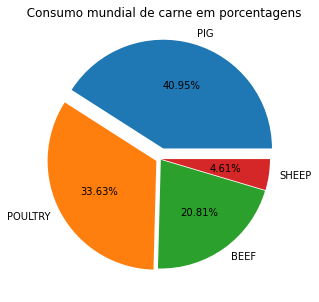

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

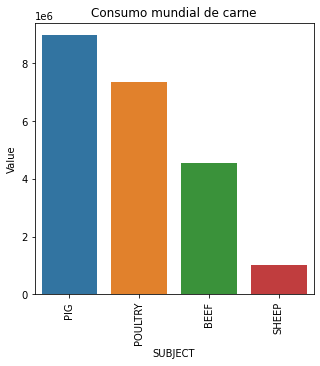

In [10]:
meat = df.groupby(by='SUBJECT')['Value'].sum().reset_index().sort_values('Value', ascending=False)
meat

labels = meat['SUBJECT']
values = meat['Value']
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct = '%1.2f%%', startangle=0,explode = (0.1, 0.04, 0.01, 0.01),)
plt.title('  Consumo mundial de carne em porcentagens')
plt.show()

plt.figure(figsize=(5,5))
sb.barplot(x = meat['SUBJECT'], y = meat['Value'], data=meat)
plt.title('Consumo mundial de carne')
plt.xticks(rotation=90)

#É possível perceber que a carne de porco é a mais consumida em termos mundiais, seguida de aves, bovina e de carneiro.


## Consumo de carne ao longo dos anos

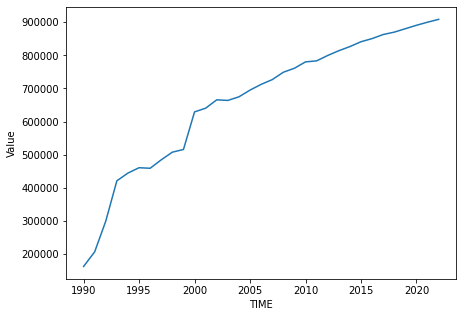

In [11]:
time = df.groupby(by=['TIME'])['Value'].sum().reset_index().sort_values('TIME', ascending=True)
plt.figure(figsize=(7,5))
sb.lineplot(x=time['TIME'], y = time['Value'])
plt.show()

#É possível perceber que o consumo de Carne aumentou 

In [12]:
df['LOCATION'].value_counts()

#Verificando quantos dados sobre cada país estão no dataframe

MYS      264
THA      264
IDN      264
IRN      264
ISR      264
VNM      264
CAN      264
MOZ      264
NGA      264
PAK      264
PRY      264
PER      264
PHL      264
URY      264
SAU      264
ZAF      264
SDN      264
IND      264
HTI      264
GHA      264
DZA      264
JPN      264
SSA      264
MEX      264
NZL      264
TUR      264
USA      264
TZA      264
ZMB      264
BGD      264
BRA      264
CHL      264
COL      264
EGY      264
CHN      262
ARG      262
AUS      260
KOR      260
UKR      256
KAZ      256
ETH      252
RUS      246
BRICS    246
EU28     244
OECD     242
WLD      230
NOR      132
CHE      132
Name: LOCATION, dtype: int64

## Qual país em média consome mais e menos carne

In [13]:
df.groupby(['LOCATION'])['Value'].mean().sort_values(ascending=False)
#O país que mais consome carne em média é a China. 


LOCATION
WLD      33542.506864
BRICS    12725.248687
OECD     12655.175333
CHN       8468.982089
EU28      5275.850251
USA       4505.582662
BRA       1972.000259
RUS       1119.306824
SSA        976.425796
MEX        725.719843
JPN        684.900803
IND        557.637178
ARG        521.695389
VNM        473.039795
CAN        383.890609
PHL        342.560501
IDN        330.129203
KOR        324.799977
ZAF        312.643463
AUS        305.589233
UKR        293.914306
PAK        292.445672
IRN        267.167162
TUR        244.874263
COL        243.192720
THA        222.238246
EGY        220.188496
MYS        190.527732
SAU        176.720096
CHL        156.060216
PER        148.890418
NGA        138.933179
CHE        135.517019
KAZ        127.032176
SDN         88.385729
ISR         88.179534
DZA         86.917083
NOR         75.699419
BGD         65.215226
ETH         64.651227
NZL         59.810854
PRY         56.196200
TZA         51.018590
URY         50.783472
GHA         25.346412
Z

In [14]:
df.groupby(['LOCATION'])['Value'].mean().sort_values(ascending=True)
#O país que menos consome carne em média é o Haiti. 


LOCATION
HTI         17.983110
MOZ         23.219807
ZMB         23.848151
GHA         25.346412
URY         50.783472
TZA         51.018590
PRY         56.196200
NZL         59.810854
ETH         64.651227
BGD         65.215226
NOR         75.699419
DZA         86.917083
ISR         88.179534
SDN         88.385729
KAZ        127.032176
CHE        135.517019
NGA        138.933179
PER        148.890418
CHL        156.060216
SAU        176.720096
MYS        190.527732
EGY        220.188496
THA        222.238246
COL        243.192720
TUR        244.874263
IRN        267.167162
PAK        292.445672
UKR        293.914306
AUS        305.589233
ZAF        312.643463
KOR        324.799977
IDN        330.129203
PHL        342.560501
CAN        383.890609
VNM        473.039795
ARG        521.695389
IND        557.637178
JPN        684.900803
MEX        725.719843
SSA        976.425796
RUS       1119.306824
BRA       1972.000259
USA       4505.582662
EU28      5275.850251
CHN       8468.982089
O

In [17]:
df_copy = df.groupby(['LOCATION','TIME'])['Value'].agg('sum').reset_index()
fig = px.line(df_copy,x="TIME", y="Value",color="LOCATION",title=  'Consumo de carne por ano e país')
fig.show() 


